In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# Interact
Widgets can be created directly, or through the `interact` function. We explore `interact` first, as it is a convenient for quick use. `interact` takes a function as its first argument, followed by the function arguments with their possible values. This creates a widgets that allows selecting those values, calling the callback with the current value for every selection. This may sound a bit abstract, but an example will hopefully clear it up. 

The `say_my_name` function, below, prints the text 'my name is {name}'. We pass `say_my_name` into `interact`, together with a list of names. This creates a dropdown filled with the names in the list. Every time we pick a name, `say_my_name` is called with the currently selected name and the printed message gets updated.

In [2]:
def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')
    
widgets.interact(say_my_name, name=["Jim", "Emma", "Bond"]);

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…

You might wonder how `interact` decided to create a dropdown list. It turns out this choice is based on the input options. In the example above these were given as a list of values, resulting in a dropdown list. 

We could also create a slider by passing a tuple of the form (start, stop, step), where the values are numerical. If all values are integers this creates an IntSlider, if floats are present (no surprise) a FloatSlider. Alternatively we could construct a checkbox by simply passing a boolean (i.e. True or False). 

The next cell shows this behaviour by reusing a single function with different input options to  create different kinds of widgets.

In [3]:
def say_something(x):
    """
    Print the current widget value in short sentence
    """
    print(f'Widget says: {x}')

widgets.interact(say_something, x=[0, 1, 2, 3])
widgets.interact(say_something, x=(0, 10, 1))
widgets.interact(say_something, x=(0, 10, .5))
_ = widgets.interact(say_something, x=True)

interactive(children=(Dropdown(description='x', options=(0, 1, 2, 3), value=0), Output()), _dom_classes=('widg…

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.5), Output()), _dom_classes=('w…

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

`interact` is not limited to single argument functions. We can pass multiple arguments to create multiple widgets, following the same rules as above. Below, we use a `three` function with three arguments to create three different widgets. Whenever one of the values is changed `three` is called with the current values of the three widgets as its arguments.

In [4]:
def three(x, y, z):
    return (x, y, z)

_ = widgets.interact(
    three, 
    x=(0, 10, 1), 
    y=True, 
    z=['a', 'b', 'c']
)

interactive(children=(IntSlider(value=5, description='x', max=10), Checkbox(value=True, description='y'), Drop…

Sometimes, not all arguments need to be linked to the widget. We can fix those using the `fixed` function. For example, fixing the `z` argument in `three` results in widgets for `x` and `y` only.

In [5]:
_ = widgets.interact(
    three, 
    x=(0, 10, 1), 
    y=True, 
    z=widgets.fixed('I am fixed')
)

interactive(children=(IntSlider(value=5, description='x', max=10), Checkbox(value=True, description='y'), Outp…

We can also use decorator syntax to create widgets with `interact`.

In [6]:
@widgets.interact(x=(0, 10, 1))
def foo(x):
    """
    Print the current widget value in short sentence
    """
    print(f'Slider says: {x}')

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…


## Putting widgets to use
Making widgets and printing stuff is all good and well, but let's do something 'slightly' more useful and create a perfectly fake oscilloscope. For this, we use matplotlib to create a plot with a fixed vertical scale and a grid. Next, we generate some `x` values between 0 and 2pi and define a function to return the sine of `x` for some frequency `w`, amplitude `amp` and phase angle `phi`. 

Finally, we define an update function that takes three arguments: `w`, `amp` and `phi`, corresponding with the parameters controlling our sine. This function clears all existing lines from the ax object (if any) and then plots a our sine wave. Adding the interact decorator completes our beautiful interactive plot.

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

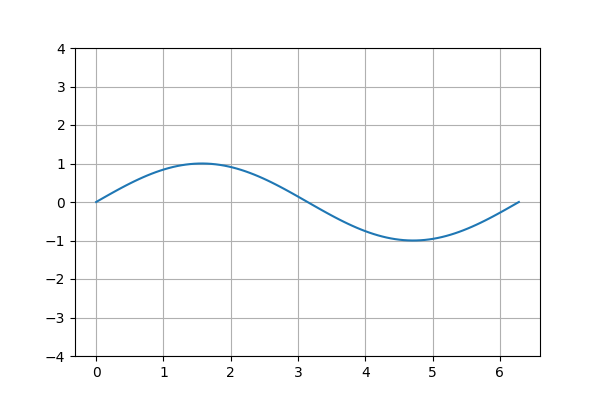

In [7]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)

# generate x values
x = np.linspace(0, 2 * np.pi, 100)


def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))


@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

For more information on using `interact`, check the official [documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html). In the next bit we'll use the widgets directly and stack them together to build larger apps.

# Widgets
Often we will want to create widgets manually, for example to build larger interfaces with interconnected components. There are many widgets to choose from. The next cell shows a quick and dirty listing of all classes defined in the ipywidgets module. Not all of these are meant for everyday use, (e.g. DOMWidget and CoreWidgets), but most of them are immediately useful. The official list can be found [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [8]:
widgets.Textarea(
    '\n'.join([w for w in dir(widgets) if not w.islower()]),
    layout=widgets.Layout(height='200px')
)

Textarea(value='Accordion\nAppLayout\nAudio\nBoundedFloatText\nBoundedIntText\nBox\nButton\nButtonStyle\nCallb…

## A few widget examples
### Text
The `Label` widget shows the value text as uneditable text. If more formatting is required, one can use an `HTML` widget. As the name implies this widget renders an html string. For editable text, there are the `Text` and `Textarea` widgets.

In [9]:
label = widgets.Label(
    value='A label')

html = widgets.HTML(
    value='<b>Formatted</b> <font color="red">html</font>', 
    description=''
)

text = widgets.Text(
    value='A text field', 
    description='text field'
)

textarea = widgets.Textarea(
    value='A text area for longer texts', 
    description='text area'
)

# show the three together in a VBox (vertical box container)
widgets.VBox([label, html, text, textarea])

### Selections
The cell below shows a few common selection widgets, some of which we met before. The IntRangeSlider is like an IntSlider but as the name implies it allows the selection of an lower and upper bound of a range. RadioButtons allow the selection of single value from a list of options, similar to the dropdown list. Checkboxes are displayed a little different with their description on the right, but still indented. The indent can be removed by passing the argument `indent`=False

A personal favourite is the combobox at the end, which starts showing a list of matching possibilities as one starts typing.

In [10]:
int_slider = widgets.IntSlider(
    value=5, 
    min=0, max=10, step=1, 
    description='slider'
)

int_range_slider = widgets.IntRangeSlider(
    value=(20, 40), 
    min=0, max=100, step=2, 
    description='range slider'
)

dropdown = widgets.Dropdown(
    value='feb', 
    options=['jan', 'feb', 'mar', 'apr'], 
    description='dropdown'
)

radiobuttons = widgets.RadioButtons(
    value='feb', 
    options=['jan', 'feb', 'mar', 'apr'], 
    description='radio buttons'
)

combobox = widgets.Combobox(
    placeholder='start typing... (e.g. L or o)',
    options=['Amsterdam', 'Athens', 'Lisbon', 'London', 'Ljubljana'], 
    description='combo box'
)

checkbox = widgets.Checkbox(
    description='checkbox',
    value=True
)


# a VBox container to pack widgets vertically
widgets.VBox(
    [
        int_slider, 
        int_range_slider, 
        dropdown, 
        radiobuttons,
        checkbox,
        combobox,
    ]
)

As before, making and displaying widgets is great but putting them to work is awesome. Below, an example is shown of a similar application as above, a sine and a slider (just the one this time). This example shows how we can use the `observe` method to connect a function to a widget trait. `Traits` are special properties that come from a parent class called `HasTraits`. To look more into this, check out the [`traitlets`](https://traitlets.readthedocs.io/en/stable/) library.

The `value` property of a widget is such a `trait`, meaning we can use `observe` to connect a callback function, which will get called every time `value` changes. The next cell shows an example, where the frequency of a sine is connected to a slider. 
Note the `continuous_update` option when creating the IntSlider. This option, also available in other widgets, makes sure the callback is only called when making changes is done (e.g. mousebutton release, enter), and not on every value traversed along the way.

<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
C:\Users\dawid\AppData\Local\Temp\ipykernel_18104\3613876816.py:14: SyntaxWarning: invalid escape sequence '\o'
  description='$\omega$',


IntSlider(value=1, continuous_update=False, description='$\\omega$', max=10)

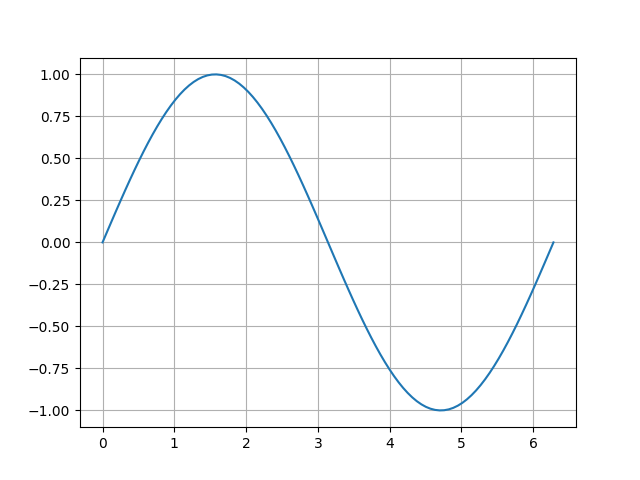

In [11]:
x = np.linspace(0, 2 * np.pi, 100)

fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)

def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
    
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider

When the value of the slider changes, the callback function is called with a single argument, change. The next cell shows a slider with a callback that only prints its input argument. As you can see, change is a dictionary-like object with several items:  
    
    'name': the name of the trait  
    'old': the previous value of the trait  
    'new': the current value of the trait  
    'owner': the widget owning the trait (here, int_slider)

In [12]:
def show_change(change):
    display(change)

int_slider = widgets.IntSlider(value=7, min=0, max=10)
int_slider.observe(show_change, 'value')
int_slider.value = 6

{'name': 'value',
 'old': 7,
 'new': 6,
 'owner': IntSlider(value=6, max=10),
 'type': 'change'}

### Linking

Widgets can also be linked together using the `link` function. This function takes two tuples of the form (widget, trait) and links the given traits of the given widgets. In the example below, `value` on the first slider is connected to `min` on the second. In this way when we change the value of the first, the minimum value of the second is updated correspondingly. There are also a `dlink` and `jslink` function doing a similar thing. `dlink` works one direction only, i.e. updating slider 1 would update slider 2 two, but not the other way around. `jslink` only works in the front-end, in javascript, and does not need a live ipykernel to work. ([docs](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html#Linking-Widgets))

Below the two sliders are initialised with the same `min` and `max` values. However, after linking them together, updating the `value` of the first to 5, automatically updates `min` for the second as well.

In [13]:
sl1 = widgets.IntSlider(description='slider 1', min=0, max=10)
sl2 = widgets.IntSlider(description='slider 2', min=0, max=10)

link = widgets.link(
    (sl1, 'value'), 
    (sl2, 'min')
)

sl1.value = 5
widgets.VBox([sl1, sl2])

links can be removed using the unlink method on the link object, `link.unlink()`

### Layout widgets
There are various ways organise widgets in an interface. We can use boxes, tabs, accordion, or a templated layout. Here, we will only look at boxes, to see the other options, please check [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Container/Layout-widgets) and [here](https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html#). 

First, we create some buttons to play with.

In [14]:
b1 = widgets.Button(description='button 1')
b2 = widgets.Button(description='button 2')
b3 = widgets.Button(description='button 3')

Using `HBox` and `VBox` widgets we can easily present our buttons in a row or column layout.

In [15]:
widgets.HBox([b1, b2, b3])

In [16]:
widgets.VBox([b1, b2, b3])

These boxes can also be nested to create more complicated layouts. Below, we create two VBoxes. One containing buttons and another containing a dropdown and some radiobuttons. Then we put the VBoxes themselves into an HBox to lay them out next to one another. 

In [17]:
def make_boxes():
    vbox1 = widgets.VBox([widgets.Label('Left'), b1, b2])
    vbox2 = widgets.VBox([widgets.Label('Right'), dropdown, radiobuttons])
    return vbox1, vbox2

vbox1, vbox2 = make_boxes()

widgets.HBox([vbox1, vbox2])

To make the left and right boxes more visible we add some layout through the `Layout` widget. Note that the syntax for setting layout parameters resembles css. For our box layout we add a solid, 1px thick red border. In addition we add some space in te form of a margin (spacing to other widgets) and padding (spacing between border and widgets inside). Instead of having a margin-top, margin-left and so on, the margin and padding are given as a single string with the values in the order of top, right, bottom & left. 

In [18]:
box_layout = widgets.Layout(
        border='solid 1px red',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')

vbox1, vbox2 = make_boxes()

vbox1.layout = box_layout
vbox2.layout = box_layout

widgets.HBox([vbox1, vbox2])

This code can have some suprising behaviour. The `Layout` object is mutable and two boxes share a single instance. Hence, making changes to the layout of box1 will also be reflected in box2. For example, see what happens when we change the width and colour of vbox1. 

In [19]:
box_layout = widgets.Layout(
        border='solid 1px red',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')

vbox1, vbox2 = make_boxes()

vbox1.layout = box_layout
vbox2.layout = box_layout

# change vbox1 only?
vbox1.layout.width = '400px'
vbox1.layout.border = 'solid 2px green'

widgets.HBox([vbox1, vbox2])

A simple workaround is to put the layout in a function that returns a freshly created instance so that every widget gets its very own layout object. Then, when making changes to vbox1, vbox2 will not change. 


In [20]:
def make_box_layout():
     return widgets.Layout(
        border='solid 1px red',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )
    
vbox1, vbox2 = make_boxes()

vbox1.layout = make_box_layout()
vbox2.layout = make_box_layout()

# really change vbox1 only
vbox1.layout.width = '400px'
vbox1.layout.border = 'solid 2px green'

widgets.HBox([vbox1, vbox2])

As mentioned at the start of this section, there are other options to design more advanced applications. An interesting alternative is the `AppLayout` widget, which facilitates building a classic application layout using a column layout sandwiched between a header and footer. Head over to the offical ([docs](https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html#AppLayout)) for some examples..

## Putting widgets to use
In the next bit we put it all together and build a simple application. We will create a matplotlib figure again, but this time inside an `Output` widget. `Output` can take all kinds of input and display the notebook. By creating the figure inside the output context it will not be drawn until the output widget is used. We can also display the same figure in multiple places, which is sometimes useful in larger applications.

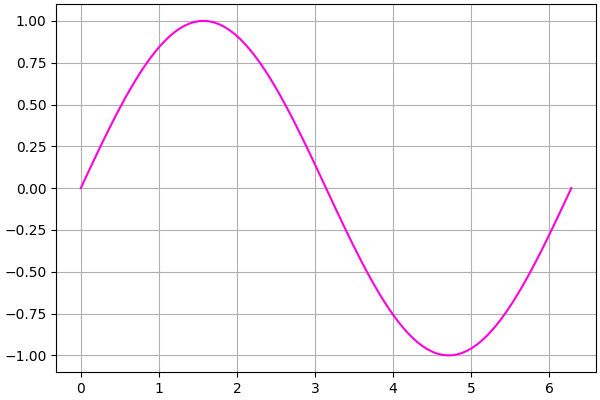

In [21]:
output = widgets.Output()

# create some x data
x = np.linspace(0, 2 * np.pi, 100)

# default line color
initial_color = '#FF00DD'

with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
    
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
ax.grid(True)    
line, = ax.plot(x, np.sin(x), initial_color)

No figure is shown yet, until we use the output widget

In [22]:
output

Output()

Note that we used the `constrained_layout`, when creating the figure. This is similar to the figure's `tight_layout` method, and makes space for the axis labels. However, `constrained_layout` is more convenient in combination with the widget matplotlib backend, as it can be applied before the figure is rendered. With tight_layout we would first have to show the figure and then call the method to make everything fit. It is an experimental feature though, so use with care ['constrained_layout'](https://matplotlib.org/3.1.1/tutorials/intermediate/constrainedlayout_guide.html)

Next, we create control widgets with their callback functions and connect them. After getting the callbacks in place we set the default values for the labels through their corresponding widgets.

In [23]:
# create some control elements
int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='freq')
color_picker = widgets.ColorPicker(value=initial_color, description='pick a color')
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)

# callback functions
def update(change):
    """redraw line (update plot)"""
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
    
def line_color(change):
    """set line color"""
    line.set_color(change.new)
    
def update_xlabel(change):
    ax.set_xlabel(change.new)
    
def update_ylabel(change):
    ax.set_ylabel(change.new)

# connect callbacks and traits
int_slider.observe(update, 'value')
color_picker.observe(line_color, 'value')
text_xlabel.observe(update_xlabel, 'value')
text_ylabel.observe(update_ylabel, 'value')

text_xlabel.value = 'x'
text_ylabel.value = 'y'

Finally, we box everything up and display evertyhing together.

In [24]:
controls = widgets.VBox([int_slider, color_picker, text_xlabel, text_ylabel])
widgets.HBox([controls, output])

## Packing components in a class
To create more high level components, we can also subclass a container and build up our gui from within. Containers have a `children` property to which we can assign a list of widgets that should be displayed. Although, we can assign a list, this is turned into a tuple and cannot be modified afterwards.
To remove or add a widget at runtime, the children tuple can be turned back into a list, followed by an insert or deletion and finalised by reassigning to the children property. Since it can be easy to make mistakes when going by index, I tend to add a placeholder box in which I only place the 'dynamic' widget.

The example below, packs the entire oscilliscope 'dashboard' in a single component by subclassing `VBox`. All the required widgets are defined in the Sines class and added as its `children`. The callbacks are defined as instance methods. It may not be a masterpiece in object oriented programming, but hopefully it shows the idea of constructing larger reusable components. Note that, we need to call `super().__init__()` from `__init__` to properly initialise the parent class. 

Sines(children=(VBox(children=(IntSlider(value=1, description='freq', max=10), ColorPicker(value='#FF00DD', de…

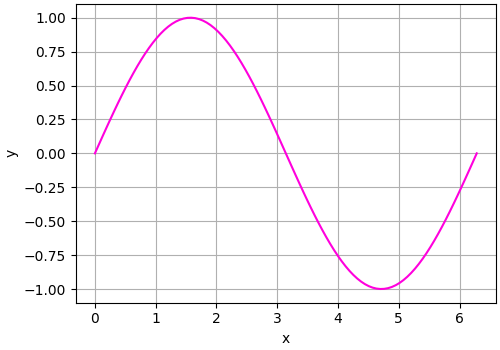

In [25]:
def make_box_layout():
     return widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )

class Sines(widgets.HBox):
    
    def __init__(self):
        super().__init__()
        output = widgets.Output()

        self.x = np.linspace(0, 2 * np.pi, 100)
        initial_color = '#FF00DD'

        with output:
            self.fig, self.ax = plt.subplots(constrained_layout=True, figsize=(5, 3.5))
        self.line, = self.ax.plot(self.x, np.sin(self.x), initial_color)
        
        self.fig.canvas.toolbar_position = 'bottom'
        self.ax.grid(True)

        # define widgets
        int_slider = widgets.IntSlider(
            value=1, 
            min=0, 
            max=10, 
            step=1, 
            description='freq'
        )
        color_picker = widgets.ColorPicker(
            value=initial_color, 
            description='pick a color'
        )
        text_xlabel = widgets.Text(
            value='', 
            description='xlabel', 
            continuous_update=False
        )
        text_ylabel = widgets.Text(
            value='', 
            description='ylabel', 
            continuous_update=False
        )

        controls = widgets.VBox([
            int_slider, 
            color_picker, 
            text_xlabel, 
            text_ylabel
        ])
        controls.layout = make_box_layout()
        
        out_box = widgets.Box([output])
        output.layout = make_box_layout()

        # observe stuff
        int_slider.observe(self.update, 'value')
        color_picker.observe(self.line_color, 'value')
        text_xlabel.observe(self.update_xlabel, 'value')
        text_ylabel.observe(self.update_ylabel, 'value')
        
        text_xlabel.value = 'x'
        text_ylabel.value = 'y'
        

        # add to children
        self.children = [controls, output]
    
    def update(self, change):
        """Draw line in plot"""
        self.line.set_ydata(np.sin(change.new * self.x))
        self.fig.canvas.draw()

    def line_color(self, change):
        self.line.set_color(change.new)

    def update_xlabel(self, change):
        self.ax.set_xlabel(change.new)

    def update_ylabel(self, change):
        self.ax.set_ylabel(change.new)
        
        
Sines()

There is a lot more to ipywidgets than was presented here. A good first start are the official [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) and [traitlets](https://traitlets.readthedocs.io/en/stable/) docs. There is a lot of active development, so it is always interesting to check for updates. There is also a lot of ongoing work on `ipympl`, so staying up to date is a good idea when using it.

Two other project that I would like to mention are Voila and ipyvuetify. The [Voila](https://github.com/voila-dashboards/voila) project makes it possible to present a notebook as an interactive web application with a live kernel. [Ipyvuetify](https://github.com/mariobuikhuizen/ipyvuetify) provides a great set of widgets based on vuetify (example in [binder](https://mybinder.org/v2/gh/mariobuikhuizen/ipyvuetify/master?filepath=examples%2FExamples%20template.ipynb)).

In [45]:
import pandas as pd
# Wczytanie danych
data = pd.read_csv("data/recent-grads.csv")
# Skracanie nazw kategorii do X znaków
data["Major"] = data["Major"].apply(lambda x: x[:15] + "…" if len(x) > 15 else x)

# Tworzenie widgetów
category_widget = widgets.Dropdown(
    options=data["Major_category"].unique(),
    description="Kategoria:",
    continuous_update=False
)

color_men_widget = widgets.ColorPicker(
    value='blue',
    description="Kolor M:",
    continuous_update=False
)

color_women_widget = widgets.ColorPicker(
    value='pink',
    description="Kolor K:",
    continuous_update=False
)

sort_column_widget = widgets.Dropdown(
    options=["Men", "Women", "Employed", "Unemployment_rate", "Median", "Low_wage_jobs"],
    description="Sortuj po:",
    continuous_update=False
)

sort_order_widget = widgets.Checkbox(
    value=False,
    description="Malejąco"
)

top_n_widget = widgets.IntSlider(
    min=5, max=20, step=1, value=10,
    description="Top N:"
)

style_widget = widgets.Dropdown(
    options=plt.style.available,
    description="Styl wykresu:",
    continuous_update=False
)

chart_type_widget = widgets.RadioButtons(
    options=['bar', 'line'],
    description="Typ wykresu:"
)

# Tworzenie interaktywnej funkcji
def update_plot(category, color_men, color_women, sort_column, sort_order, top_n, style, chart_type):
    plt.style.use(style)  # Ustawienie stylu
    
    filtered_data = data[data["Major_category"] == category]
    
    # Sortowanie i wybór top N
    filtered_data = filtered_data.sort_values(by=sort_column, ascending=not sort_order).head(top_n)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(filtered_data))  # Pozycje dla słupków
    
    if chart_type == 'bar':
        width = 0.4
        bars1 = ax.bar(x - width/2, filtered_data["Men"], width, label="Mężczyźni", color=color_men)
        bars2 = ax.bar(x + width/2, filtered_data["Women"], width, label="Kobiety", color=color_women)
        
        # Dodanie wartości nad słupkami
        for bar in bars1 + bars2:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)
    
    elif chart_type == 'line':
        ax.plot(filtered_data["Major"], filtered_data["Men"], marker='o', label="Mężczyźni", color=color_men)
        ax.plot(filtered_data["Major"], filtered_data["Women"], marker='s', label="Kobiety", color=color_women)

    ax.set_xticks(x)
    ax.set_xticklabels(filtered_data["Major"], rotation=45, ha='right')
    ax.set_ylabel("Liczba osób")
    ax.set_title(f"Podział na płeć w kategorii {category} (sortowanie: {sort_column})")
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Interaktywny widżet
widgets.VBox([
    category_widget, 
    color_men_widget, 
    color_women_widget, 
    sort_column_widget, 
    sort_order_widget, 
    top_n_widget, 
    style_widget, 
    chart_type_widget, 
    widgets.interactive_output(update_plot, {
        'category': category_widget, 
        'color_men': color_men_widget, 
        'color_women': color_women_widget, 
        'sort_column': sort_column_widget, 
        'sort_order': sort_order_widget, 
        'top_n': top_n_widget, 
        'style': style_widget,
        'chart_type': chart_type_widget
    })
])
